(365, 393, 3)
(284, 315, 3)


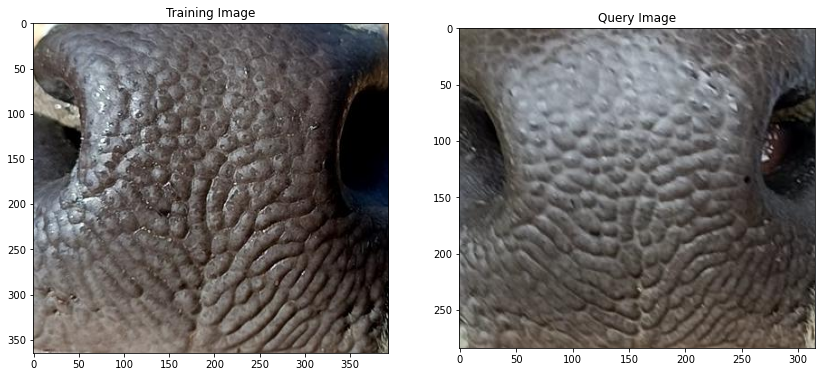

In [1]:
import cv2
import matplotlib.pyplot as plt
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread(r"Test\test_cattle_1.jpg")
print(image1.shape)
# Load the query image
image2 = cv2.imread(r'Database/database_cattle_3.jpg')
print(image2.shape)
# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

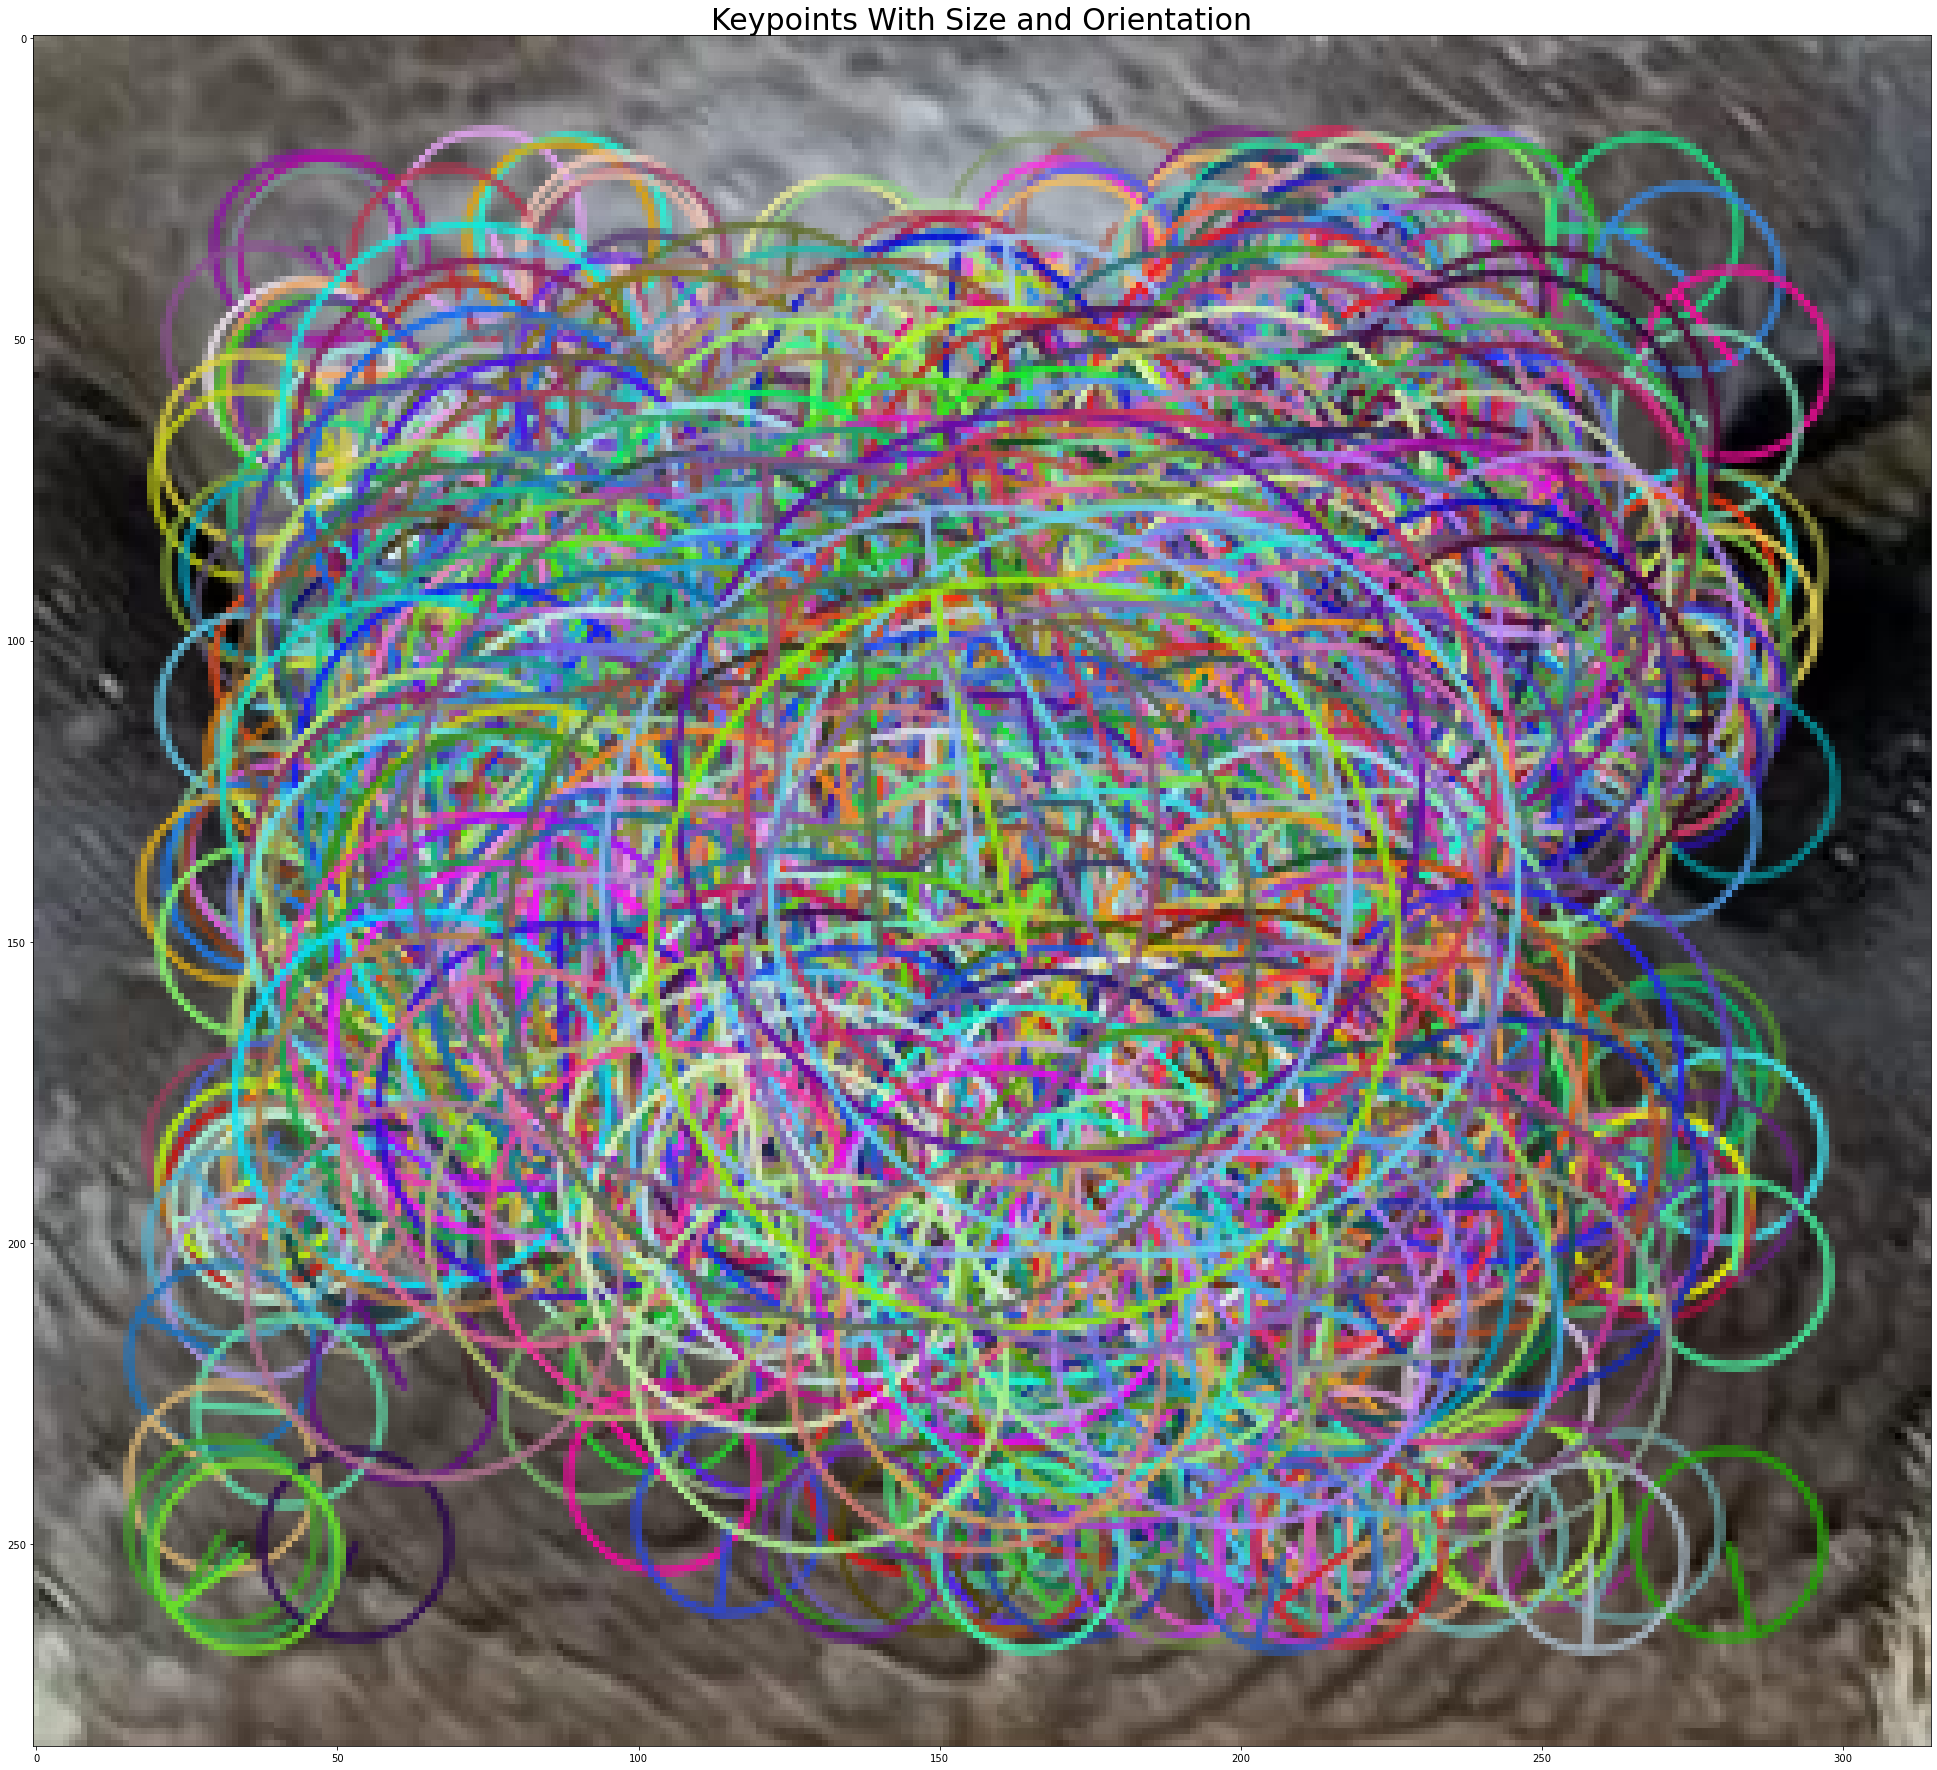


Number of keypoints Detected:  917


In [2]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
# print(training_gray.shape)
# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
# print(query_gray.shape)
# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(5000, 2.0, WTA_K = 4)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

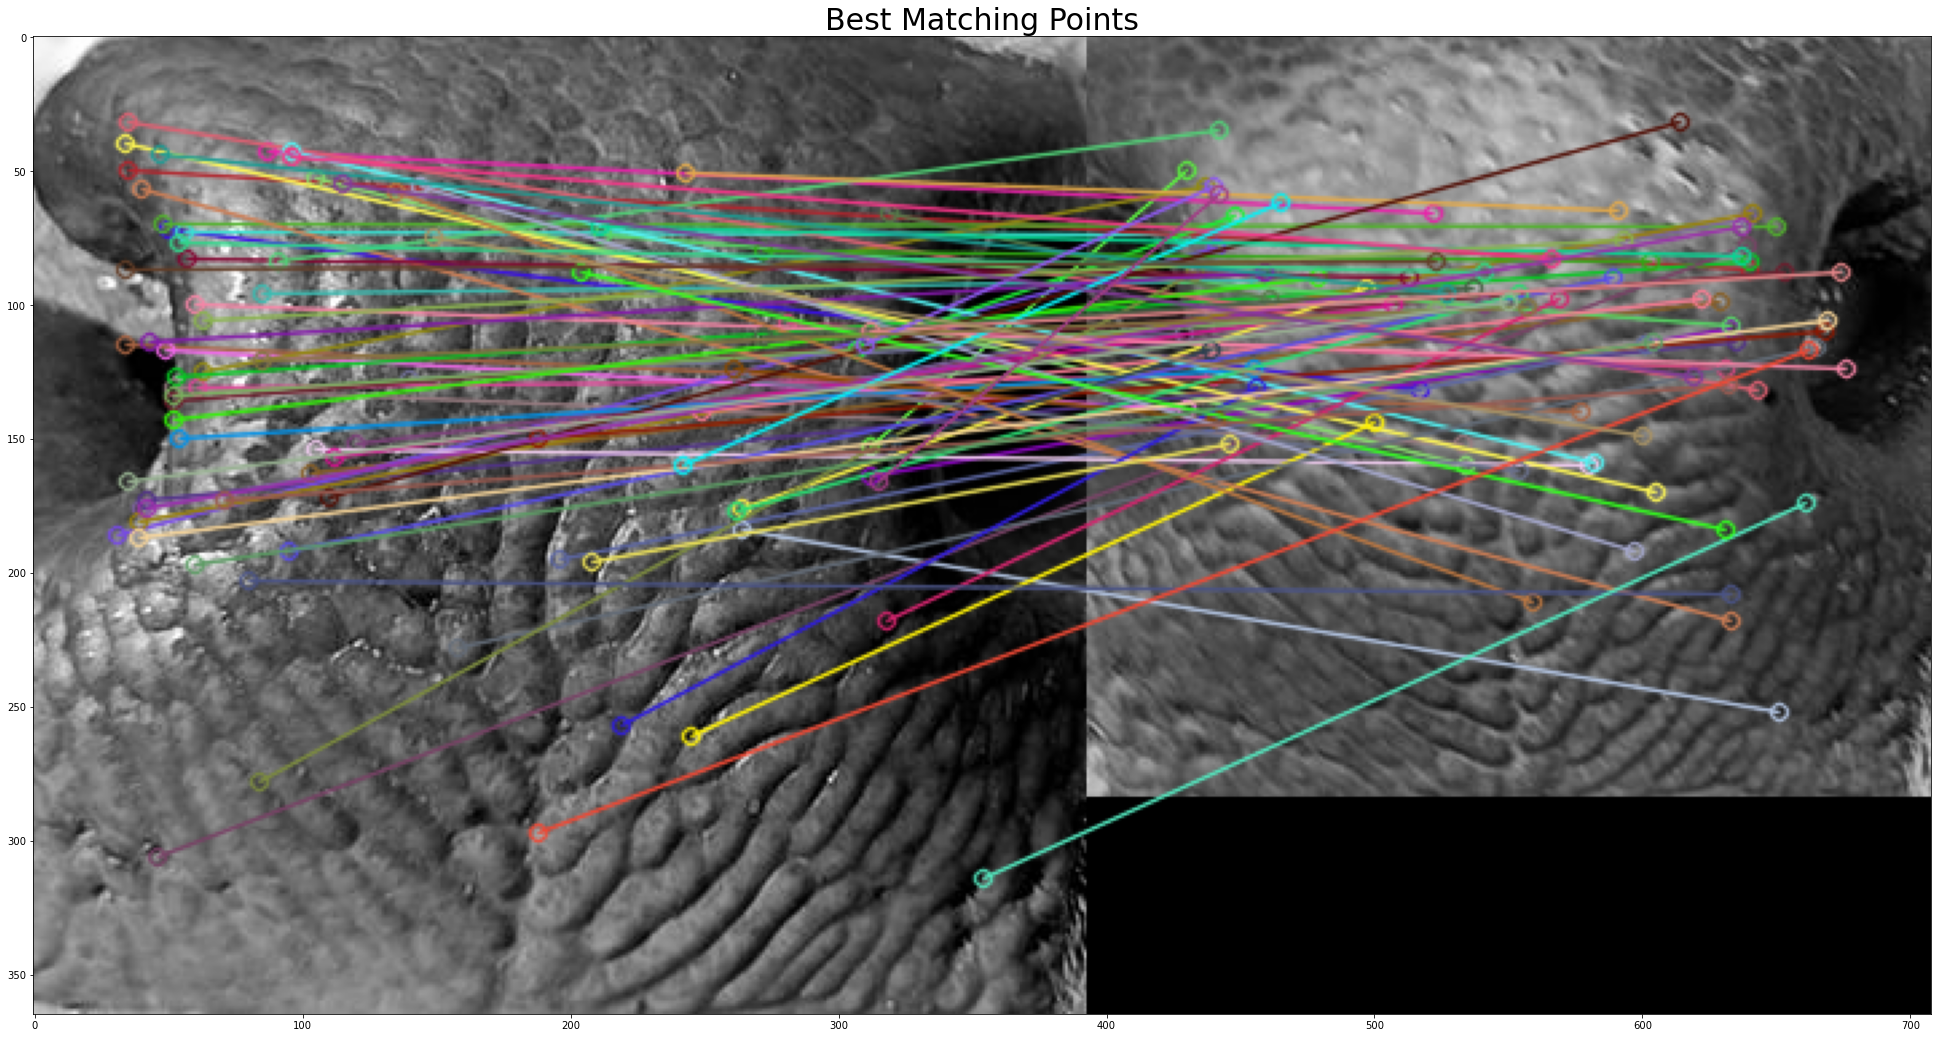

Number of Keypoints Detected In The Training Image:  3351
Number of Keypoints Detected In The Query Image:  917

Number of Matching Keypoints Between The Training and Query Images:  687


In [3]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [4]:
import cv2
import imutils
import numpy as np
import os
orb=cv2.ORB_create(nfeatures=5000,scaleFactor = 2.0, WTA_K = 4)

#Loading images from folder reading and storing names
def readImages():
    images=[]
    data_names=[]
    path=os.getcwd()
    path = os.path.join("Database")
    for root,dirs,files in os.walk(path):
        for image in files:
            img=cv2.imread(os.path.join(path,image),0)
            images.append(img)
            data_names.append(image.split('.')[0])
    return images,data_names

# Find descriptors of all images and store in list
def getDescriptors(images):
    descriptors=[]
    for image in images:
        kps,des=orb.detectAndCompute(image,None)
        descriptors.append(des)
    return descriptors

# Get matching descriptors for frame with features > threshold value
def findMatch(gray_frame,descriptors,names,thresh=5):
    kps,des=orb.detectAndCompute(gray_frame,None)
    scores=[]
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = False)
    try:
        for descriptor in descriptors:
            matches=bf.knnMatch(des,descriptor,k=2)
            good=[]
            for m,n in matches:
                if m.distance < 0.75 * n.distance:
                    good.append([m])
            scores.append(len(good))
    except:
        pass
    name=""
    if len(scores)!=0:
        if max(scores)>thresh:
            name = data_names[scores.index(max(scores))]
    return name,scores

In [5]:
import cv2
import imutils
images,data_names = readImages()
descriptors = getDescriptors(images)

In [6]:
import glob
test_names = []
database_names = []
for i in glob.glob('Test\*.jpg'):
    img = cv2.imread(i)
    gray_frame=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    name,scores = findMatch(gray_frame,descriptors,data_names)
    print(scores,i, name)
    cv2.putText(img,name,(20,20),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,255),2)
#     cv2.imshow("frame",img)
#     cv2.waitKey(0)
    test_names.append(i.replace('Test/','').split('.jpg')[0])
    database_names.append(name)
# cv2.destroyAllWindows() 

[34, 35, 57, 50, 47, 37, 40, 28, 26, 42, 36, 47, 49, 46, 50, 36, 32, 42, 41, 31] Test\test_cattle_1.jpg database_cattle_11
[14, 16, 13, 17, 24, 9, 14, 5, 8, 16, 31, 14, 17, 14, 12, 17, 13, 6, 17, 7] Test\test_cattle_2.jpg database_cattle_19
[17, 19, 20, 21, 36, 25, 25, 15, 13, 14, 17, 18, 28, 27, 23, 14, 8, 15, 20, 19] Test\test_cattle_3.jpg database_cattle_13
[11, 6, 21, 8, 9, 15, 7, 9, 10, 6, 8, 12, 9, 14, 8, 9, 6, 12, 5, 5] Test\test_cattle_4.jpg database_cattle_11
[22, 16, 30, 24, 15, 15, 23, 10, 15, 16, 17, 21, 36, 23, 12, 13, 24, 22, 15, 28] Test\test_cattle_5.jpg database_cattle_20


In [7]:
import pandas as pd
df = pd.DataFrame(list(zip(test_names, database_names)),
               columns =['Test Image', 'Database Image'])

In [8]:
df

,Test Image,Database Image
0,Test\test_cattle_1,database_cattle_11
1,Test\test_cattle_2,database_cattle_19
2,Test\test_cattle_3,database_cattle_13
3,Test\test_cattle_4,database_cattle_11
4,Test\test_cattle_5,database_cattle_20


In [9]:
df.to_csv('out_orb.csv',index=False)